In [1]:
import tensorflow
from tensorflow import keras
from time import time

C:\Users\danis\Anaconda3\envs\ai3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\danis\Anaconda3\envs\ai3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\danis\Anaconda3\envs\ai3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\danis\Anaconda3\envs\ai3\lib\site-packages\tensorflow\python\framework

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
import cv2

In [3]:
train_df = pd.read_csv("dataset/train.csv")
test_df = pd.read_csv("dataset/test.csv")

In [4]:
train_dir = os.path.join("./dataset/"+'Train/')
test_dir = os.path.join("./dataset/"+'Test/')

In [5]:
train_fnames = list(os.listdir(train_dir))
test_fnames = list(os.listdir(test_dir))

In [6]:
def create_train_dataset(list_of_images,train_dir,train_df):
    train_labels,train_images = [],[]
    
    for image in tqdm(list_of_images):
        img = cv2.imread(train_dir+image)
        img = cv2.resize(img,(64,64),interpolation=cv2.INTER_CUBIC)
        train_images.append(img)
        
        if image in list(train_df['ID']):
            train_labels.append(train_df.loc[train_df['ID']==image,'Class'].values[0])
    
    return train_images,train_labels
            

In [7]:
train_images,train_labels = create_train_dataset(train_fnames,train_dir,train_df)

100%|███████████████████████████████████████████████████████████████████████████| 19906/19906 [00:54<00:00, 363.30it/s]


In [8]:
print(len(train_images),len(train_labels))

19906 19906


In [9]:
def prep_test_data(list_of_images,test_df):
    test_images = []
    
    for image in tqdm(list_of_images):
        img = cv2.imread(test_dir+image)
        img = cv2.resize(img,(64,64),interpolation=cv2.INTER_CUBIC)
        test_images.append(img)
        
    return test_images

In [10]:
test_images = prep_test_data(test_fnames,test_dir)

100%|████████████████████████████████████████████████████████████████████████████| 6636/6636 [00:02<00:00, 2778.53it/s]


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

train_labels = le.fit_transform(train_labels)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(train_images,train_labels,test_size=0.2,stratify=train_labels,random_state=26)

In [15]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

Using TensorFlow backend.


In [16]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=False,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.1)

test_datagen = ImageDataGenerator(rescale=1/255)

In [17]:
train_datagen.fit(x_train)
test_datagen.fit(x_test)
test_datagen.fit(test_images)

In [18]:
x_train = np.array(x_train)
x_test = np.array(x_test)
test_image = np.array(test_images)

In [19]:
train_set = train_datagen.flow(x_train,
                              to_categorical(y_train,3),
                              batch_size=256)
test_set = test_datagen.flow(x_test,
                            to_categorical(y_test,3),
                            batch_size=64)

In [43]:
from keras.models import Sequential,Model
from keras.applications import VGG16,InceptionV3,Xception,ResNet50,ResNet50V2,InceptionResNetV2
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D,LeakyReLU
from livelossplot import PlotLossesKeras
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers.core import Activation
from keras.layers.advanced_activations import ELU
from keras.regularizers import l2

In [ ]:
'''model_tr = ResNet50V2(weights='imagenet',
                     include_top=False,
                     input_shape=(64,64,3))

#model_tr.trainable = False'''

In [ ]:
'''l1 = GlobalAveragePooling2D()(model_tr.output)
#l2 = Dense(256,activation='relu')(l1)

#l3 = Dropout(0.35)(l2)
l4 = Dense(128,activation='relu')(l1)
l5 = Dropout(0.4)(l4)
l6 = BatchNormalization()(l5)
l7 = Dense(68,activation='relu')(l6)
l8 = Dropout(0.25)(l7)
l9  =Dense(34,activation='relu')(l8)

out = Dense(3,activation='softmax')(l9)

model_tl = Model(inputs=model_tr.input,outputs=out)
#model_tl.summary()'''

In [23]:
#model_tl.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
'''model = Sequential()

model.add(model_tr)
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.20))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

model.summary()'''

In [ ]:
'''model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape = (64, 64, 3)))
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3)))
model.add(LeakyReLU(alpha=0.3)) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))# Dropout
model.add(Dropout(0.4))#Max Poolingmodel.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(LeakyReLU(alpha=0.3))
model.add(BatchNormalization())# Dropout
model.add(Dropout(0.3))#Flatten
model.add(Flatten())
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(64))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])'''

In [59]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape = (64, 64, 3)))
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3)))
model.add(LeakyReLU(alpha=0.3))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
# Dropout
model.add(Dropout(0.4))
#Max Pooling
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(LeakyReLU(alpha=0.3))
model.add(BatchNormalization())
# Dropout
model.add(Dropout(0.3))
#Flatten
model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [50]:
'''model = Sequential()
reg = 0.00015
chanDim = -1
# Block #1: first CONV => RELU => POOL layer set
model.add(Conv2D(96, (11, 11), strides=(4, 4),
            input_shape=(64,64,3), padding="same",
			kernel_regularizer=l2(reg)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Dropout(0.25))

		# Block #2: second CONV => RELU => POOL layer set
model.add(Conv2D(256, (5, 5), padding="same",
		kernel_regularizer=l2(reg)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Dropout(0.25))

		# Block #3: CONV => RELU => CONV => RELU => CONV => RELU
model.add(Conv2D(384, (3, 3), padding="same",
		kernel_regularizer=l2(reg)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(384, (3, 3), padding="same",
		kernel_regularizer=l2(reg)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(256, (3, 3), padding="same",
		kernel_regularizer=l2(reg)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Dropout(0.25))

		# Block #4: first set of FC => RELU layers
model.add(Flatten())
model.add(Dense(4096, kernel_regularizer=l2(reg)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

		# Block #5: second set of FC => RELU layers
model.add(Dense(4096, kernel_regularizer=l2(reg)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

		# softmax classifier
model.add(Dense(3, kernel_regularizer=l2(reg)))
model.add(Activation("softmax"))

model.compile(optimizer='adam',loss='categorical_crosentropy',metrics=['accuracy'])'''
		


In [ ]:
#tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

In [69]:
callback = [PlotLossesKeras()]

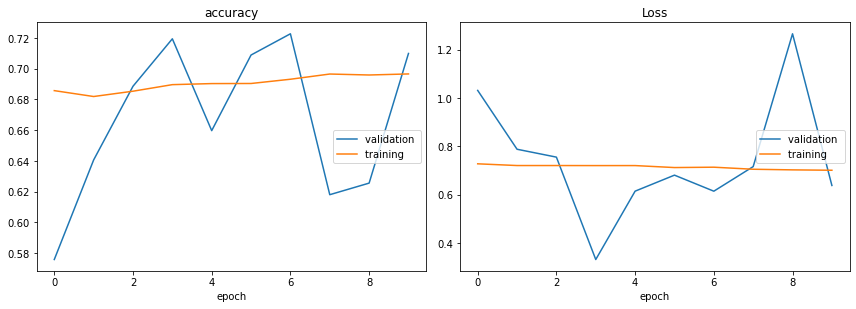

accuracy
	validation       	 (min:    0.576, max:    0.723, cur:    0.710)
	training         	 (min:    0.682, max:    0.697, cur:    0.697)
Loss
	validation       	 (min:    0.332, max:    1.265, cur:    0.638)
	training         	 (min:    0.701, max:    0.728, cur:    0.701)


In [70]:
model.fit(train_set,
         validation_data=test_set,
         steps_per_epoch=len(train_set),
         validation_steps=len(test_set),
         callbacks=callback,
         epochs=10)

In [71]:
y_pred = model.predict(test_image)
y_pred = [np.argmax(i) for i in y_pred]

In [72]:
y_pred = le.inverse_transform(y_pred)

In [73]:
submission = pd.DataFrame({'Class': y_pred,'ID':test_fnames})

In [74]:
submission.to_csv("Submission.csv",index=False)

In [42]:
model_tl.save("Final Model/model_tl.h5")

In [36]:
model_json = model_tl.to_json()

with open("final_model_tl.json",'w') as file:
    file.write(model_json)

In [75]:
model.save("Final Model/model.h5")

In [76]:
model_json2 = model.to_json()

with open("final_model.json",'w') as file:
    file.write(model_json2)